In [2]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import warnings
from PIL import Image
import re
import squarify
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')

In [3]:
mask = np.array(Image.open("C:/Users/Kavan/Desktop/1.png"))
data = pd.read_csv("C:/Users/Kavan/Desktop/GTD/globalterrorismdb_0617dist.csv",encoding='ISO-8859-1')
data = data[data['gname']!='Unknown']
a = data[data['gname']!='Unknown']['gname'].value_counts()
data['weaptype1_txt'] = data['weaptype1_txt'].apply(lambda x: 'Vehicle' if x=='Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)' else x)
text = data['addnotes']

In [11]:
# Show a word-cloud
def get_wordcloud(text):
    text = text.dropna()
    text = text.to_string()
    text = re.sub(' +',' ',text)
    wordcloud = WordCloud(mask = mask).generate(text)
    plt.figure()
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0,y=0)
    plt.show()

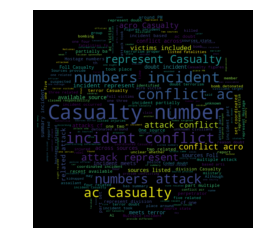

In [13]:
get_wordcloud(text)

In [15]:
d = data.groupby(['latitude','longitude'])['latitude'].count()
d = pd.DataFrame(d)
d.columns = ['count']
d.reset_index(level=0,inplace=True)
d.reset_index(level=0,inplace=True)
m = folium.Map(location=[20,0],zoom_start=2)
for i in range(0,len(d)):
	folium.Circle(location=[d.iloc[i]['latitude'],d.iloc[i]['longitude']],radius = d.iloc[i]['count']*1000).add_to(m)

<Figure size 432x288 with 0 Axes>

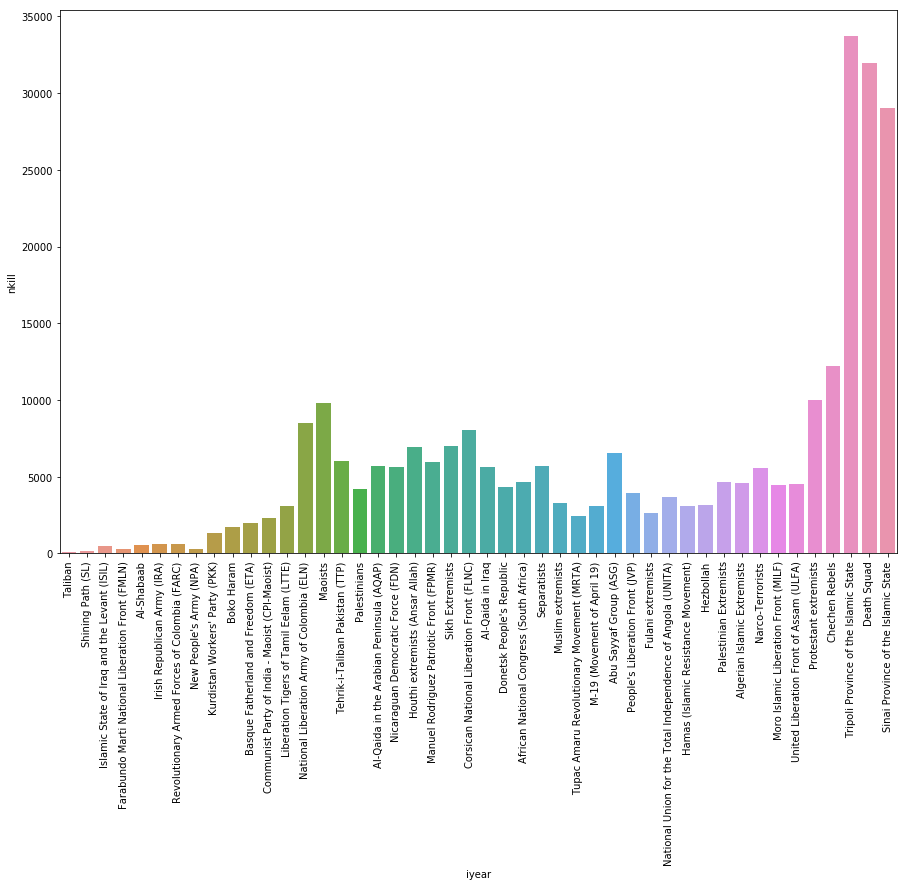

In [33]:
data['nkill'].fillna(0)
no_of_kills = data.groupby('iyear')['nkill'].sum()
plt.subplots(figsize=(15,10))
plot1 = sns.barplot(no_of_kills.index,no_of_kills)
plot1.set_xticklabels(a.index,rotation=90)
plt.show()

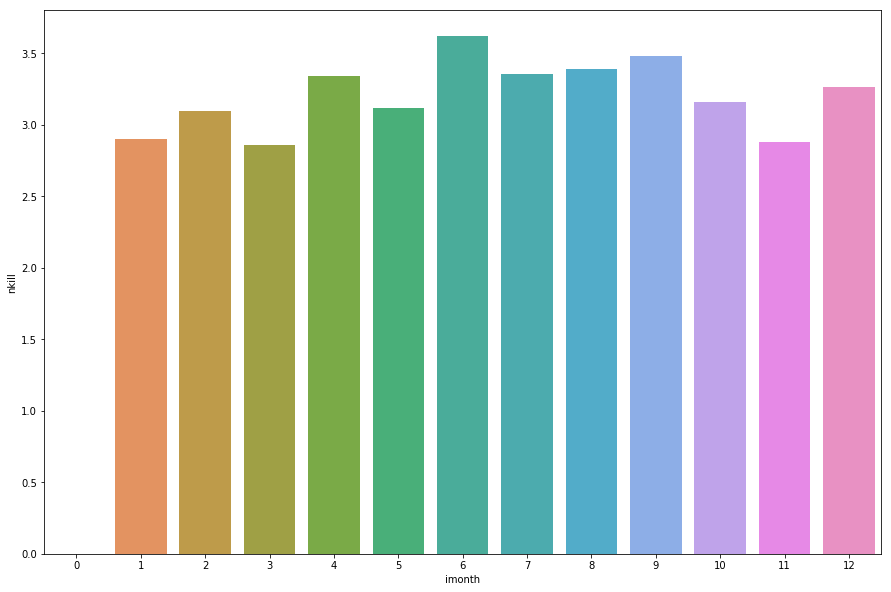

In [35]:
plt.subplots(figsize=(15,10))
kills_month = data.groupby('imonth')['nkill'].mean()
plot2 = sns.barplot(kills_month.index,kills_month)
plt.show()

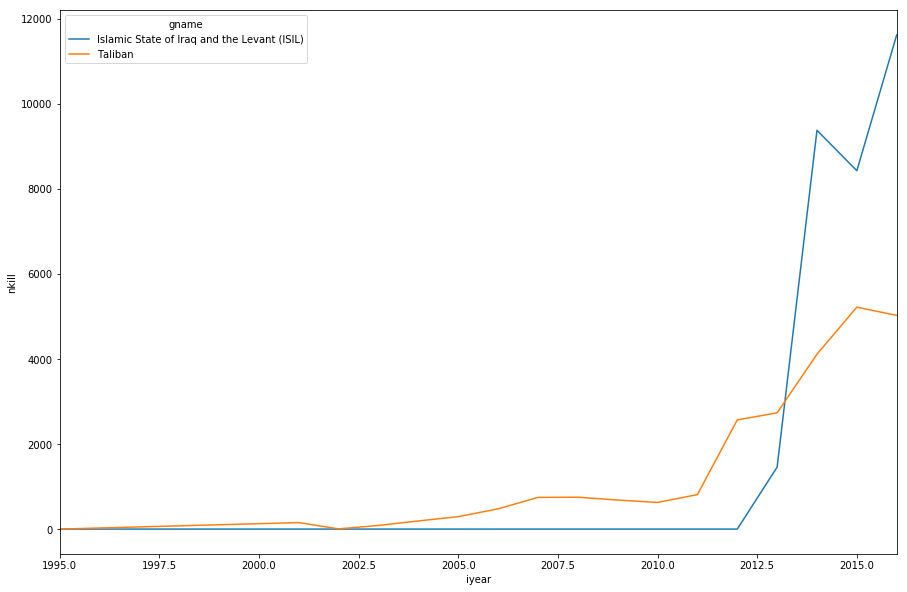

In [38]:
plt.subplots(figsize=(15,10))
d = data[(data['gname']=='Taliban') | (data['gname']=='Islamic State of Iraq and the Levant (ISIL)')]
d3 = pd.DataFrame(d.groupby(['iyear','gname'])['nkill'].sum())
d3.reset_index(inplace=True)
d3 = d3.pivot(index='iyear',columns='gname',values='nkill')
d3 = pd.DataFrame(d3.unstack(level=0))
d3 = d3.fillna(0)
d3.reset_index(inplace=True)
d3.columns=['gname','iyear','nkill']
d3['dummy']=0
sns.tsplot(time="iyear",value="nkill",condition="gname",data=d3,unit="dummy")
plt.show()

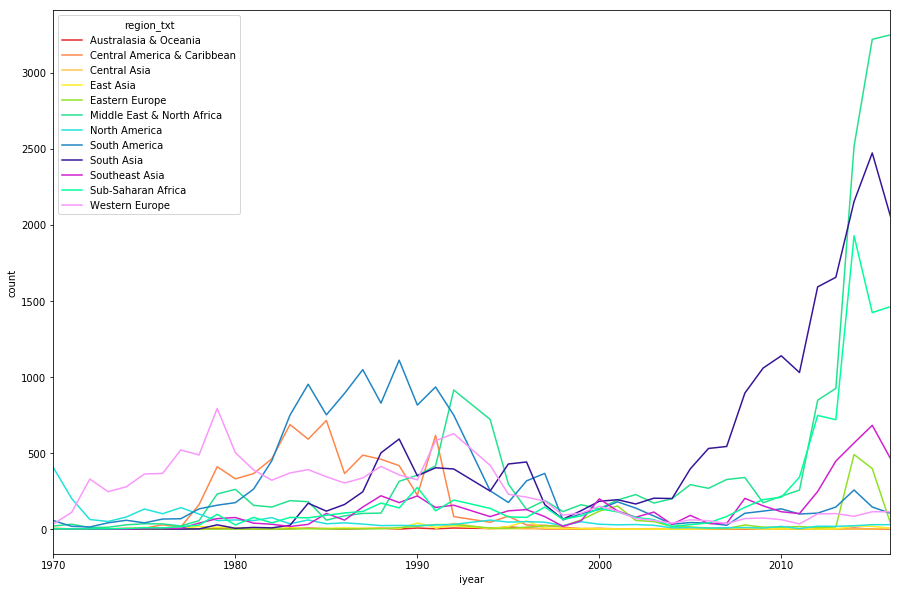

In [39]:
plt.subplots(figsize=(15,10))
d = data.groupby(['region_txt','iyear'])['iyear'].count()
d = pd.DataFrame(d)
d.reset_index(level=0,inplace=True)
d.columns = ['region_txt','count']
d.reset_index(level=0,inplace=True)
d['dummy']=0
color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce","#00ff99","#fa97fc"]
sns.tsplot(time='iyear',value='count',condition='region_txt',data=d,unit='dummy',color = sns.color_palette(color_set))
plt.show()

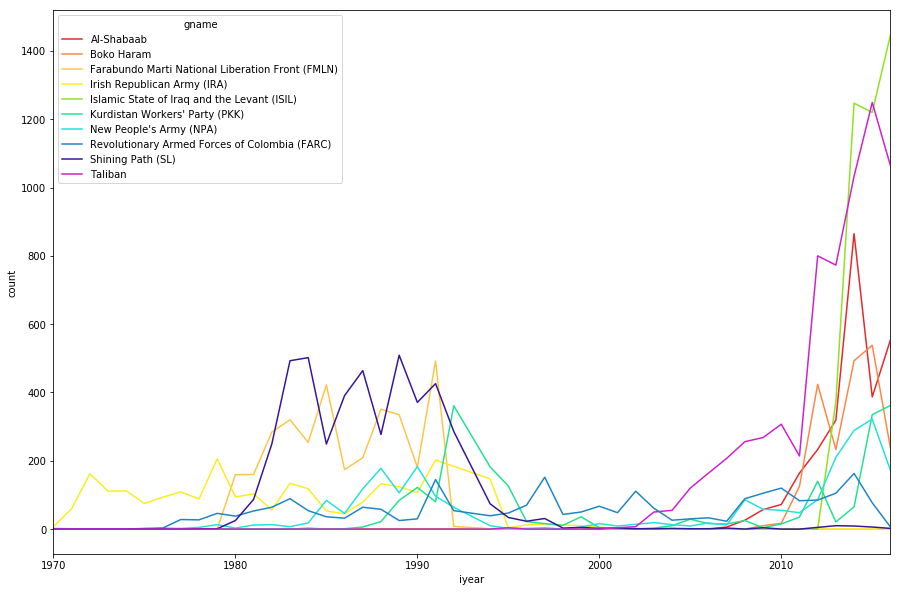

In [40]:
plt.subplots(figsize=(15,10))
d = pd.DataFrame(data.groupby(['gname','iyear'])['iyear'].count())
d.columns=['count']
d.reset_index(inplace=True)
d2 = d.loc[d['gname'].isin(data['gname'].value_counts().sort_values(ascending=False).index[:10])]
d2 = d2.pivot(index='gname',columns='iyear',values='count').fillna(0)
d2 = pd.DataFrame(d2.unstack(level=0))
d2.reset_index(inplace=True)
d2.columns=['iyear','gname','count']
color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce"]
d2['dummy']=0
sns.tsplot(time='iyear',value='count',condition='gname',data=d2,unit='dummy',color = sns.color_palette(color_set))
plt.show()

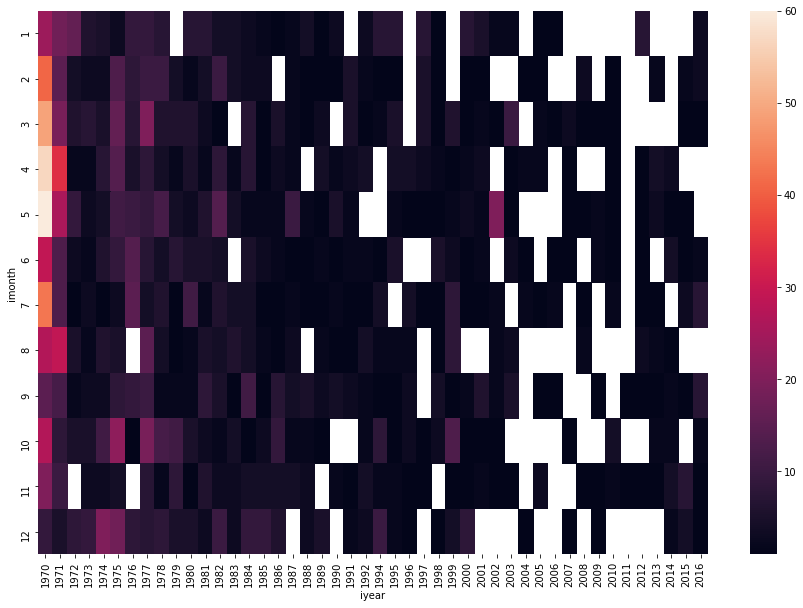

In [44]:
plt.subplots(figsize=(15,10))
d = data[data['country_txt']=="United States"]
d2 = d.groupby(['iyear','imonth'])['iyear'].count()
d2 = pd.DataFrame(d2)
d2 = d2.fillna(0)
d2.columns = ['count']
d2.reset_index(inplace=True)
d2 = d2.pivot("imonth","iyear","count")
sns.heatmap(d2)
plt.show()

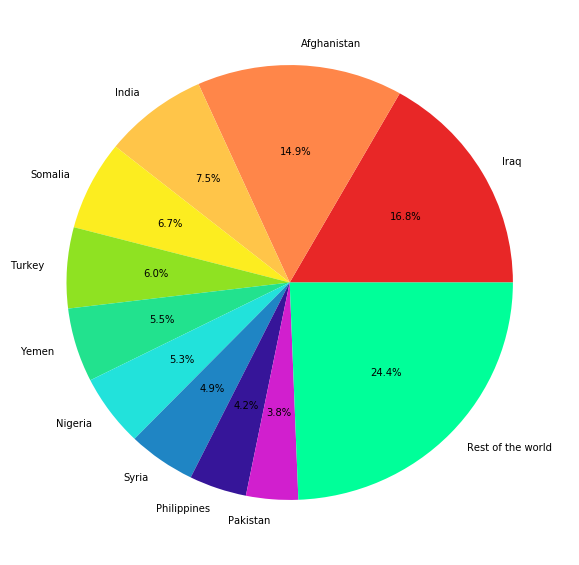

In [53]:
plt.subplots(figsize=(10,10))
d = pd.DataFrame(data[data['iyear']==2016]['country_txt'].value_counts(sort=True)[:10])
d.reset_index(inplace=True)
d.columns=['country','no_of_attacks']
append = ['Rest of the world',sum(data[data['iyear']==2016]['country_txt'].value_counts(sort=True)) - sum(data[data['iyear']==2016]['country_txt'].value_counts(sort=True)[:10])]
d.loc[len(d)]= append
color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce","#00ff99","#fa97fc"]
plt.pie(d['no_of_attacks'],labels=d['country'],colors= color_set,autopct='%.1f%%')
plt.show()


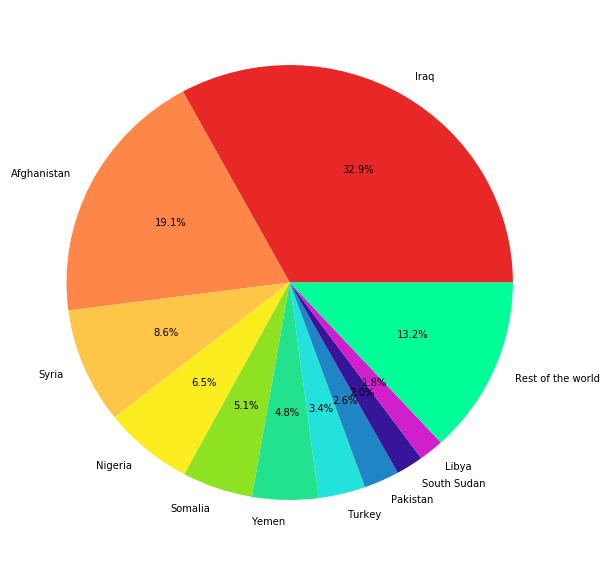

In [54]:
plt.subplots(figsize=(10,10))
d = data[data['iyear']==2016]
d2 = pd.DataFrame(d.groupby('country_txt')['nkill'].sum().sort_values(ascending=False)[:10])
d2.reset_index(inplace=True)
append = ['Rest of the world',(d['nkill'].sum()- d2['nkill'].sum())]
d2.loc[len(d2)] = append
color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce","#00ff99","#fa97fc"]
plt.pie(d2['nkill'],labels=d2['country_txt'],colors= color_set,autopct='%.1f%%')
plt.show()

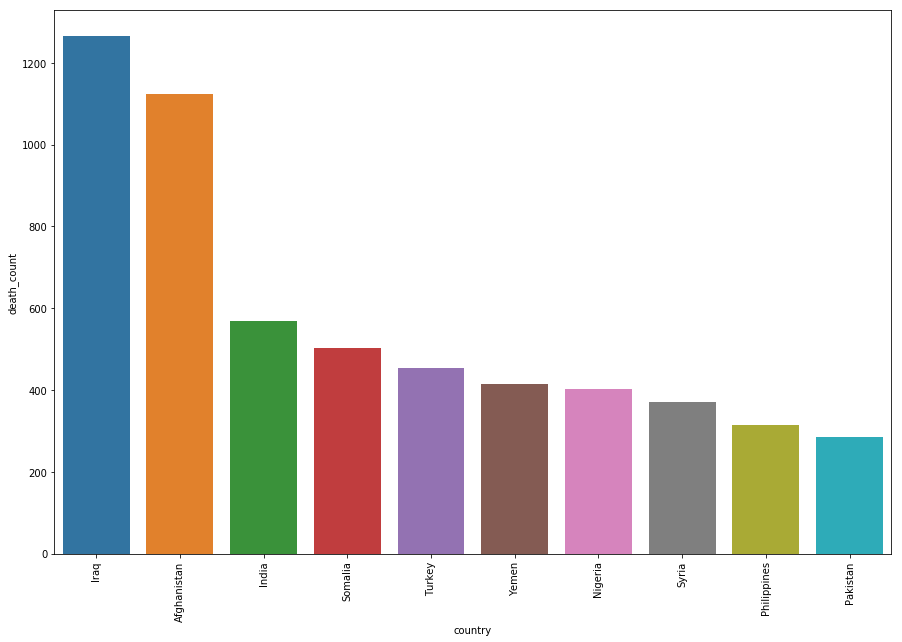

In [8]:
plt.subplots(figsize=(15,10))
d = data[data['iyear']==2016]
countries = pd.DataFrame(d['country_txt'].value_counts()[:10])
countries.reset_index(inplace=True)
countries.columns= ['country','death_count']
population = pd.Series([37202572,34656032,1324171354, 14317996, 79512426, 27584213, 20672987, 18430453, 103320222, 193203476])
countries2 = copy.deepcopy(countries)
countries['death_count'] = countries['death_count']/population
p1 = sns.barplot(countries2['country'],countries2['death_count'],data= countries2)
p1.set_xticklabels(countries2['country'],rotation=90)
plt.show(p1)

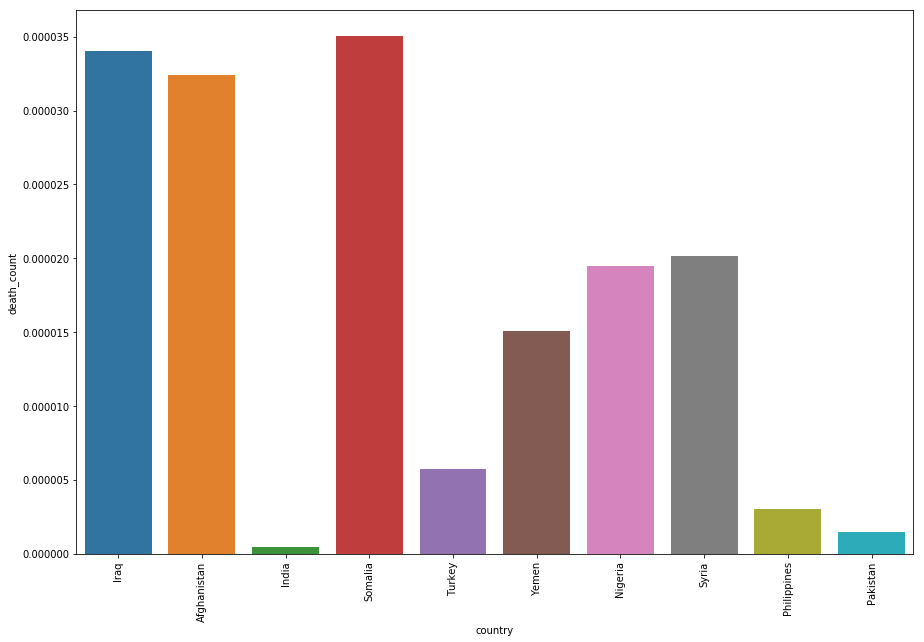

In [9]:
plt.subplots(figsize=(15,10))
p2 = sns.barplot(countries['country'],countries['death_count'],data= countries)
p2.set_xticklabels(countries['country'],rotation=90)
plt.show()

In [59]:
def prep(data,classes):
    l = LabelEncoder()
    a = data[data['gname']!='Unknown']['gname'].value_counts()
    data2 = data[data['gname']!='Unknown']
    data2['provstate'] = data2.apply(lambda row: row['city'] if pd.isnull(row['provstate']) else row['provstate'], axis=1)
    dataf = data2.loc[:,data2.columns[[1,2,3,5,7,9,11,13,14,16,19,20,21,22,28,34,58,81]]]
    data3 = dataf[(dataf.crit1==1) & (dataf.crit2==1) & (dataf.crit3 ==1) & (dataf.doubtterr==0)]
    data4 = data3[data3['gname'].isin(a.index[:classes])]
    data4 = data4.sample(frac=1)
    data4 = data4.dropna()
    data4['provstate'] = l.fit_transform(data4['provstate'])
    data4['gname'] = l.fit_transform(data4['gname'])
    y = data4['gname']
    data4 = data4.drop('gname',axis=1)
    train = data4[:round(0.5*len(data4))]
    y_train = y[:round(0.5*len(data4))]
    test = data4[round(0.5*len(data4)):]
    y_test = y[round(0.5*len(data4)):]
    return train, y_train, test, y_test

In [61]:
rf = RandomForestClassifier()
def predict(model,train,y_train,test,y_test):
    model.fit(train,y_train)
    yhat = model.predict(test)
    return yhat, accuracy_score(y_test,yhat),f1_score(y_test,yhat,average='weighted')

In [62]:
train, y_train, test, y_test = prep(data,100)

In [65]:
yhat , score1, score2 = predict(rf,train, y_train, test, y_test)

In [68]:
print ("Accuracy score :",score1 , "\nF1-score :",score2)

Accuracy score : 0.885464720562656 
F1-score : 0.8796321688724309
